# Machine learning with Scikit-learn (a.k.a. sklearn)

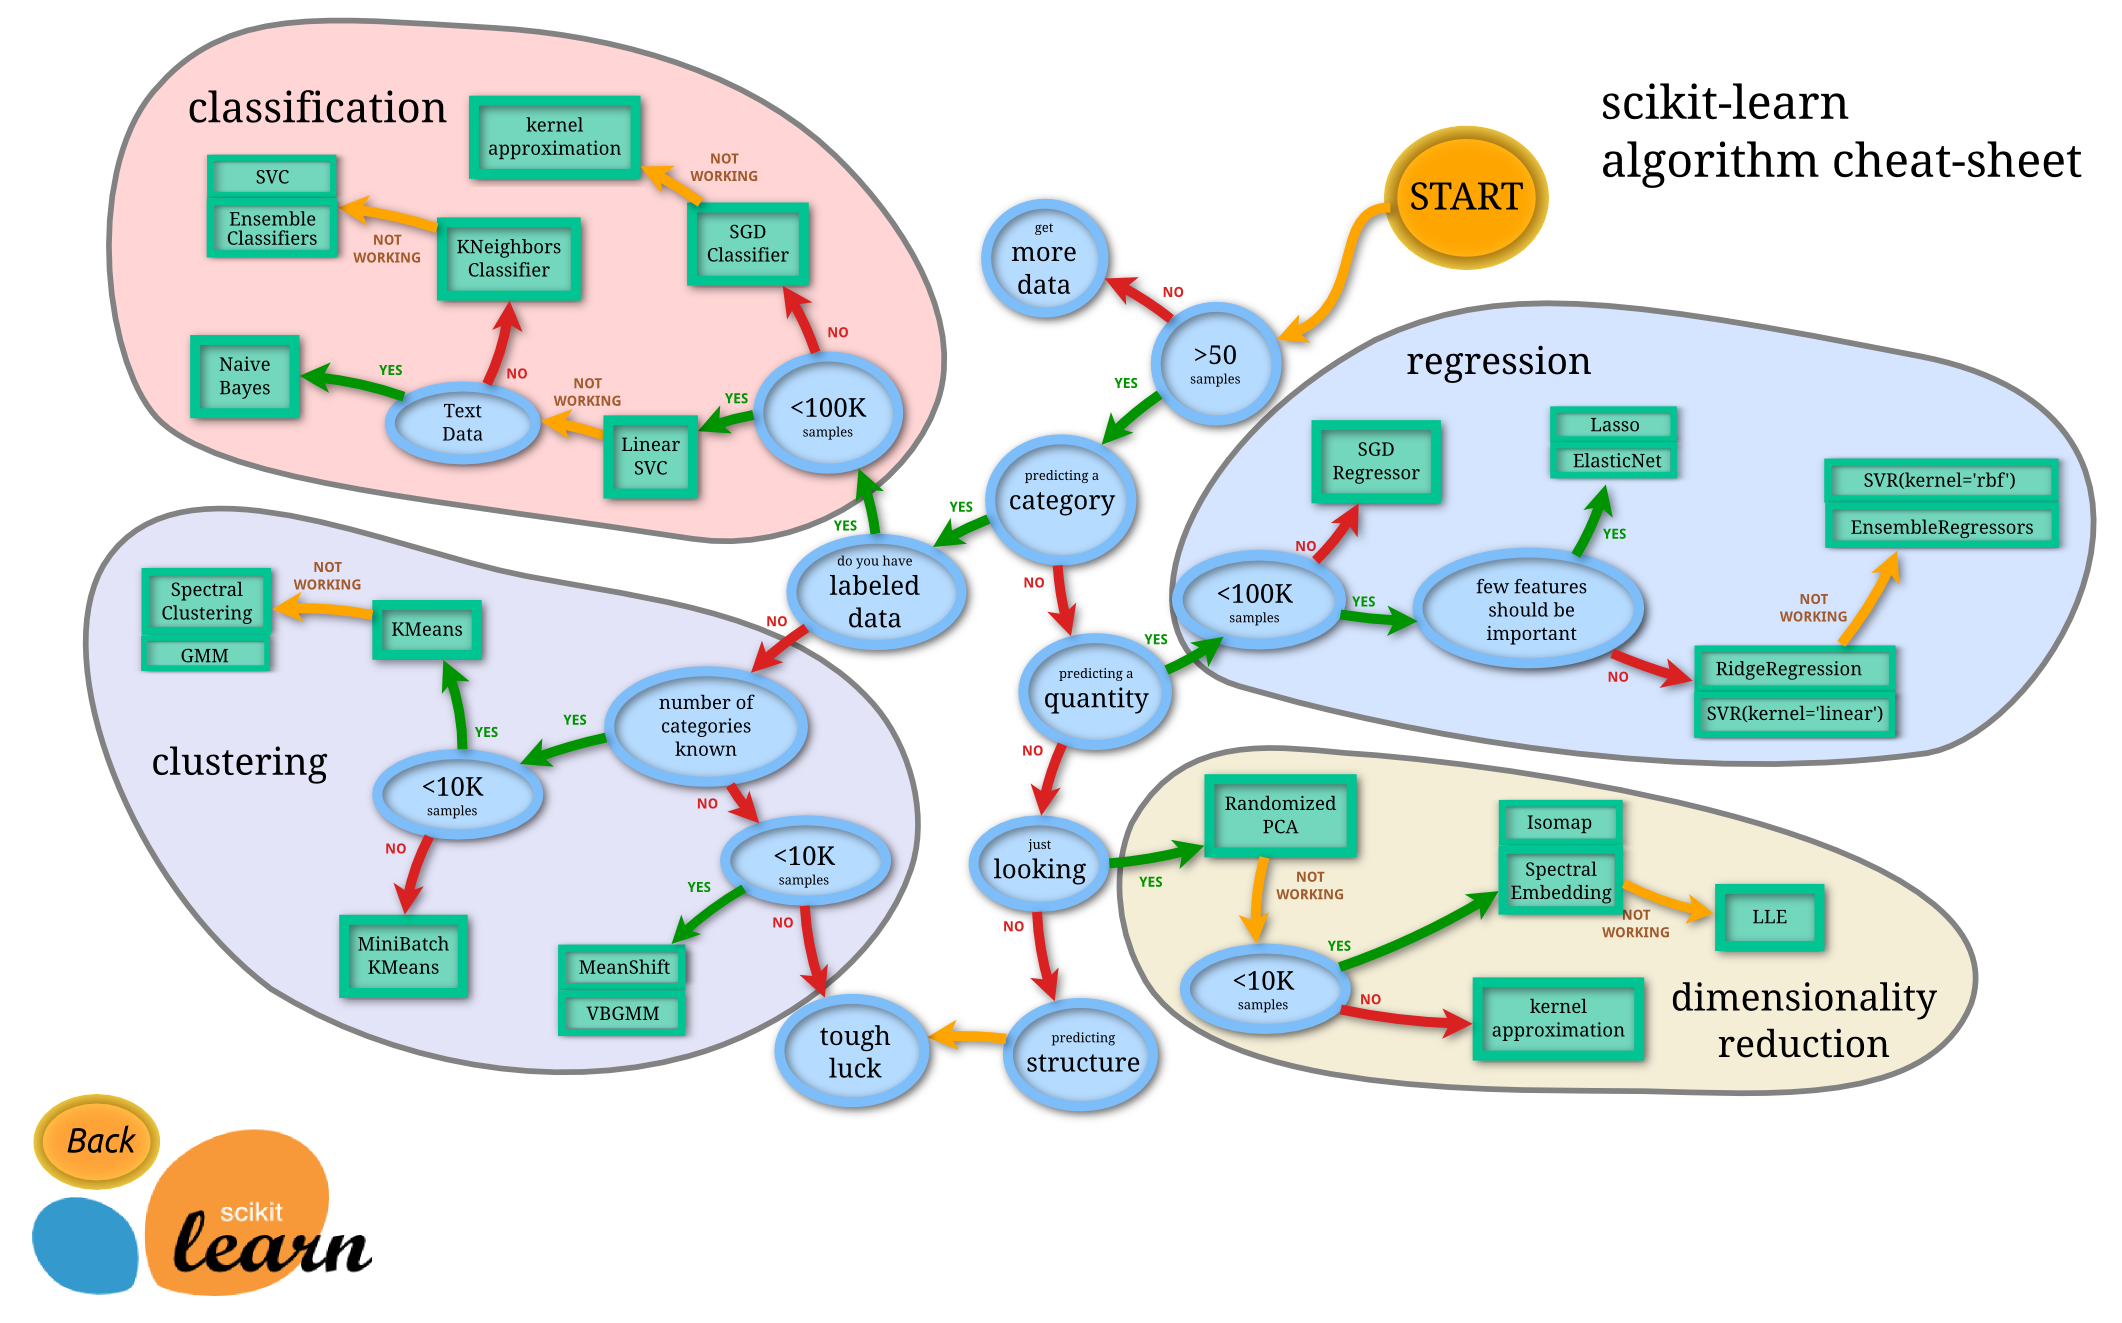

In [1]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png", width=800)

# Typical workflow

## Data acquisition
 - Getting training, validation, test data

## Preprocessing
 - Scaling, normalization
 - Encoding categorical features
 - Handling missing data     

### Exploration and visualization
 - PCA 
 - Feature selection
 - T-SNE

### Estimator selection (Classifiers and Regressors)
 - SVM
 - Random Forest
 - Linear Regression
 - Gaussian Process Regression (GPR)
 - Neural Networks (-> pytorch, tensorflow, ...)

### Model selection
 - Dataset splitting, shuffling
 - Cross-validation
 - Performace evaluation
 


### Not covered: unsupervised learning (clustering)
    



# Supervised learning: Predicting Titanic survivors

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

import pandas as pd
seaborn.set()

# Data acquisition

In [3]:
df = pd.read_csv('data/titanic/train.csv')

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Encoding categorical data

In [5]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [6]:
df['Sex_int'] =  df['Sex'].map({'female':0, 'male':1})

In [7]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_int  
0      0         A/5 21171   7.2500   NaN        S        1  
1      0          PC 17599  71.2833   C85        C        0  
2      0  STON/O2. 3101282   7.9250   NaN        S        0  
3      0            113803  53.1000  C123        S        0  
4      0            373450   8.0500   NaN        S        1

### Merge features

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_int  FamilySize  
0      0         A/5 21171   7.2500   NaN        S        1           1  
1      0          PC 17599  71.2833   C85        C        0           1  
2      0  STON/O2. 3101282   7.9250   NaN        S        0           0  
3      0            113803  53.1000  C123        S        0           1  
4      0            373450   8.0500   NaN        S        1           0

In [9]:
df = df[['Pclass', 'Age', 'Sex_int', 'Survived', 'Fare', 'FamilySize']]
df.head()

Pclass   Age  Sex_int  Survived     Fare  FamilySize
0       3  22.0        1         0   7.2500           1
1       1  38.0        0         1  71.2833           1
2       3  26.0        0         1   7.9250           0
3       1  35.0        0         1  53.1000           1
4       3  35.0        1         0   8.0500           0

### Handle missing values

In [10]:
df.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [11]:
df.FamilySize.isnull().value_counts()

False    891
Name: FamilySize, dtype: int64

In [12]:
len(df)

891

In [13]:
df = df.dropna()

In [14]:
len(df)

714

In [15]:
df.Age.isnull().value_counts()

False    714
Name: Age, dtype: int64

### Convert to numpy

In [16]:
X = df.drop('Survived', axis=1).values
X.shape

(714, 5)

In [17]:
y = df.Survived.values
y.shape

(714,)

# Data exploration and visualization

Find patterns in the data that can be modeled using a classifier.

See panda exercised for more data exploration.

Plot some of our data:

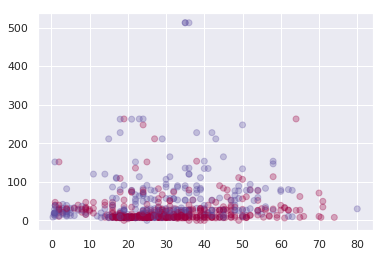

In [18]:
plt.scatter(X[:,1], X[:, 3], c=y, alpha=0.3, cmap=plt.cm.Spectral);

### Feature scaling

(0.8901433691756272, 3.109856630824373, -3.574176600441501, 83.99417660044149)

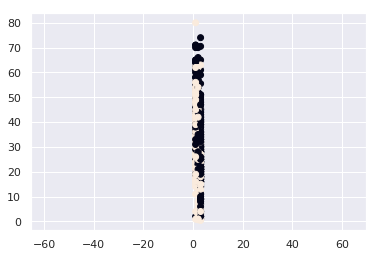

In [19]:
plt.scatter(X[:,0], X[:, 1], c=y);
plt.axis('equal')

In [20]:
from sklearn import preprocessing
X = preprocessing.scale(X)
X.mean(axis=0)
X.shape

(714, 5)

### Visualizing high-dimensional data

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_proj = tsne.fit_transform(X)
X_proj

array([[  8.7119255 , -14.634287  ],
       [-12.105149  ,  21.664309  ],
       [ 23.858597  ,  21.158188  ],
       ...,
       [ -9.329373  ,  18.138727  ],
       [-24.252829  ,   0.10461958],
       [  4.1685143 , -30.684267  ]], dtype=float32)

In [22]:
X_proj.shape

(714, 2)

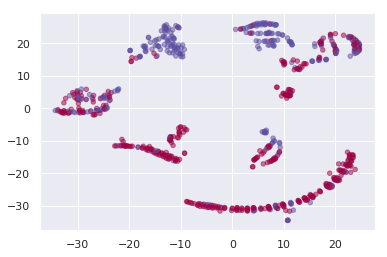

In [23]:
plt.scatter(X_proj[:,0], X_proj[:, 1], c=y, alpha=0.5, s=20, cmap=plt.cm.Spectral);

# Training an estimator

### K nearest neighbor (kNN) classification

In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
knn.fit(X, y);

In [26]:
y_pred = knn.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [27]:
print("{0} / {1} correct".format(np.sum(y_pred == y), len(y)))

622 / 714 correct


In [28]:
acc = knn.score(X,y)
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.8711


### Train a Support Vector Machine (SVM)

In [29]:
from sklearn import svm

svc = svm.SVC(kernel='rbf', C=1000).fit(X, y)
svc

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print("Accuracy: {:.4f}".format(svc.score(X, y)))

Accuracy: 0.8739


## A quick regression example

### Create some simple data

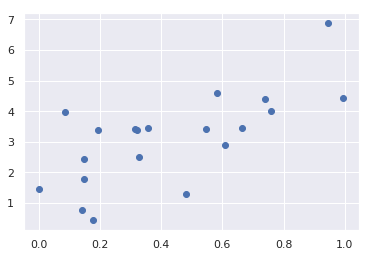

In [32]:
X1 = np.random.random(size=(20, 1))
y1 = 3 * X1.squeeze() + 2 + np.random.randn(20)

plt.plot(X1.squeeze(), y1, 'o');

### Fit a line to the data, a.k.a. Linear Regression:

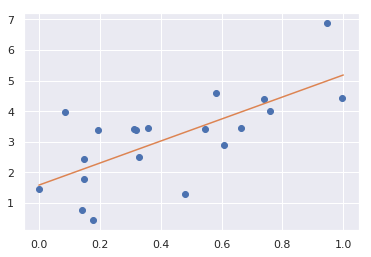

In [33]:
model = LinearRegression()
model.fit(X1, y1)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X1.squeeze(), y1, 'o')
plt.plot(X_fit.squeeze(), y_fit);

# Model selection

Performance of model for unknown samples?
### Split data into training and validation set

In [34]:
from sklearn.model_selection import train_test_split

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train.shape, X_val.shape

((571, 5), (143, 5))

In [35]:
svc = svm.SVC(kernel='rbf', C=1000).fit(X_train, y_train)
print("Accuracy: {:.4f}".format(svc.score(X_val, y_val)))

Accuracy: 0.7902


In [36]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
print("Accuracy: {:.4f}".format(knn.score(X_val, y_val)))

Accuracy: 0.8042


### Test multiple splits with **Cross-Validation**:

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm.SVC(kernel='rbf', C=1000), X, y, cv=5)
scores

array([0.69230769, 0.78321678, 0.81818182, 0.76923077, 0.79577465])

### Finding optimal parameters using Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=3, n_jobs=1, return_train_score=True)

In [39]:
grid_search.fit(X, y);

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.5944055944055944, total=   0.0s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.5944055944055944, total=   0.0s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.5944055944055944, total=   0.0s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.5944055944055944, total=   0.0s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.5915492957746479, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1, kernel=rbf, score=0.7762237762237763, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ...... C=0.1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, kernel=rbf, score=0.7902097902097902, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.8391608391608392, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.8111888111888111, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.8111888111888111, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.8661971830985915, total=   0.0s
[CV] C=10, kernel=rbf ................................................
[CV] ....... C=10, kernel=rbf, score=0.7552447552447552, total=   0.0s
[CV] C=10, kernel=rbf ................................................
[CV] ....... C=10, kernel=rbf, score=0.8321678321678322, total=   0.0s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


In [40]:
grid_search.cv_results_

{'mean_fit_time': array([0.01089883, 0.0086606 , 0.00862656, 0.01095901, 0.02708364,
        0.16369119]),
 'std_fit_time': array([7.51291710e-05, 1.32906962e-04, 4.24925685e-04, 7.88833537e-04,
        3.92285237e-03, 3.73196510e-02]),
 'mean_score_time': array([0.00218554, 0.00167332, 0.00140257, 0.00128856, 0.00126042,
        0.00135078]),
 'std_score_time': array([3.55144141e-05, 1.54207987e-05, 2.63386822e-05, 5.48220906e-05,
        7.56331377e-05, 6.24506692e-05]),
 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'kernel': 'rbf'},
  {'C': 0.1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kern

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'kernel': 'rbf'}
0.8235294117647058


## Overfitting

In [42]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=1, n_jobs=4, 
                           return_train_score=True)
grid_search.fit(X, y);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.0s finished


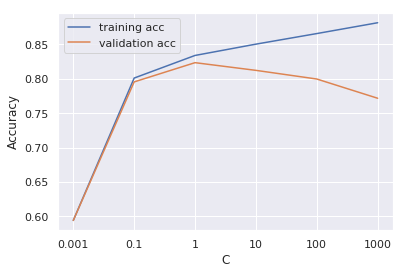

In [43]:
plt.plot(grid_search.cv_results_['mean_train_score'], label="training acc")
plt.plot(grid_search.cv_results_['mean_test_score'], label="validation acc")
plt.xticks(np.arange(len(param_grid['C'])), param_grid['C']); 
plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');